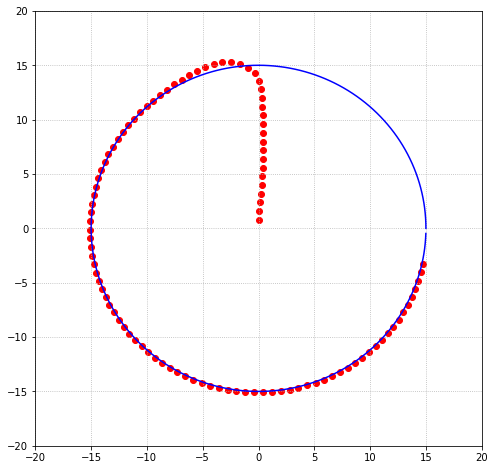

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
 
# set figure size
plt.figure(figsize=(8, 8))
 
# define UGV class
class UGV_model:
    def __init__(self, x0, y0, theta0, v0, L, T):
        self.x = x0
        self.y = y0
        self.theta = theta0
        self.v = v0
        self.l = L
        self.dt = T
    def update(self,deltat):
        dx_vs_dt = self.v*np.cos(self.theta) 
        dy_vs_dt = self.v*np.sin(self.theta)
        dtheta_vs_dt = self.v*np.tan(deltat)/self.l
        self.x += dx_vs_dt*self.dt
        self.y += dy_vs_dt*self.dt
        self.theta += dtheta_vs_dt*self.dt
    def draw(self):
        plt.scatter(self.x, self.y, color='r')
        plt.axis([-20, 20, -20, 20])
        plt.grid(linestyle=":")
        
# set circle reference trajectory
refer_traj = np.ones((200,2))
for k in range(200):
    refer_traj[k,0] = 15*math.cos(2*np.pi/200*k)
    refer_traj[k,1] = 15*math.sin(2*np.pi/200*k)
 
# draw reference trajectory
plt.plot(refer_traj[:,0], refer_traj[:,1], color='b')
 
# an UGV instance
ugv = UGV_model(0, 0, np.pi/2, 1.6, 2.6, 0.5)
 
# define lookahead
ld = ugv.v*2
 
# Pure Pursuit algorithm
flag = 0
 
for i in range(200):
    vehicle_state = np.zeros(2)
    vehicle_state[0] = ugv.x
    vehicle_state[1] = ugv.y
    cnt = 0;
    min_ds = 100000000; 
    Q = []
    for m in range(flag,200):
        deltax,deltay = refer_traj[m] - vehicle_state
        ds = math.sqrt(deltax*deltax+deltay*deltay)
        if(ds >= ld):
            temp = [ds,refer_traj[m,0],refer_traj[m,1],m]
            Q.append(temp)
            cnt += 1
        else:
            pass
    pass
    
    # catch the nearest reference point
    for j in range(cnt):
        if(Q[j][0]<min_ds):
            flag = Q[j][3]
            min_ds = Q[j][0]            
        else:
            pass
    pass
          
    dx,dy = refer_traj[flag] - vehicle_state
    alpha = math.atan2(dy,dx) - ugv.theta
    delta = math.atan(2*np.sin(alpha)*ugv.l/min_ds)
    ugv.update(delta)
    ugv.draw()
    
    # pursuit the end reference point
    if(flag==199):
        break
    else:
        pass